In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import RobustScaler, LabelEncoder

In [2]:
data = pd.read_csv(r'C:\Users\NGH\Documents\Stage Ari\ArkeUp\20210610_pf-envtest_batteryMilliVolts.csv',sep=',',on_bad_lines='skip',chunksize=3574457)
data = pd.DataFrame(data.get_chunk(3574457))
df = data.copy()
df

,_id,id,externalId,name,pfVehicleId,type,value,dateTime,providerType,metaDataProvider
0,6063834e304a3d000e1cf0f2,c93b15d6-e7ce-4e82-8d64-5ebb1a50b3a5,212014918914083,PF-65062,PF-65062,batteryMilliVolts,5412.0,2020-07-31T02:21:40Z,Samsara,"{""batteryMilliVolts"":{""time"":""2020-07-31T02:21..."
1,6063834e304a3d000e1cf0f9,9e77fdd9-c7ad-42f7-b703-f040b2eb5007,212014918915100,ST-14867,ST-14867,batteryMilliVolts,25864.0,2021-03-30T19:18:24Z,Samsara,"{""batteryMilliVolts"":{""time"":""2021-03-30T19:18..."
2,6063834e304a3d000e1cf10d,b7cf79a0-7c2e-42fc-9955-b34dc998670b,212014918915223,PF-78663,PF-78663,batteryMilliVolts,1211.0,2021-03-30T10:51:17Z,Samsara,"{""batteryMilliVolts"":{""time"":""2021-03-30T10:51..."
3,6063834e304a3d000e1cf112,86382b2f-7315-40a1-aa8e-eea795191f85,844424930157962,98729,98729,batteryMilliVolts,14469.0,2021-03-30T19:59:34Z,Samsara,"{""batteryMilliVolts"":{""time"":""2021-03-30T19:59..."
4,6063834e304a3d000e1cf103,d124506b-59f1-4612-9df5-9797a964a040,212014918886624,PF-80093,PF-80093,batteryMilliVolts,12525.0,2021-03-30T19:13:39Z,Samsara,"{""batteryMilliVolts"":{""time"":""2021-03-30T19:13..."
...,...,...,...,...,...,...,...,...,...,...
3574452,6075ed59c577c4000c603916,da2a2a9d-c527-454d-b1e0-f4fdbd6480c8,212014918886645,PF-83980,PF-83980,batteryMilliVolts,12835.0,2021-04-13T19:03:17Z,Samsara,"{""batteryMilliVolts"":{""time"":""2021-04-13T19:03..."
3574453,6075ed59c577c4000c603917,da2a2a9d-c527-454d-b1e0-f4fdbd6480c8,212014918886645,PF-83980,PF-83980,batteryMilliVolts,12839.0,2021-04-13T18:53:15Z,Samsara,"{""batteryMilliVolts"":{""time"":""2021-04-13T18:53..."
3574454,6075ed59c577c4000c603918,da2a2a9d-c527-454d-b1e0-f4fdbd6480c8,212014918886645,PF-83980,PF-83980,batteryMilliVolts,12837.0,2021-04-13T18:55:17Z,Samsara,"{""batteryMilliVolts"":{""time"":""2021-04-13T18:55..."
3574455,6075ed59c577c4000c603919,da2a2a9d-c527-454d-b1e0-f4fdbd6480c8,212014918886645,PF-83980,PF-83980,batteryMilliVolts,12833.0,2021-04-13T18:51:15Z,Samsara,"{""batteryMilliVolts"":{""time"":""2021-04-13T18:51..."


In [3]:
alert_data = pd.read_csv(r'C:\Users\NGH\Documents\Stage Ari\ArkeUp\20210610_pf-envtest_alertNotification.csv',sep=',',on_bad_lines='skip')
alert_df = alert_data.copy()
alert_df

,_id,subject,description,type,externalId,name,time,code,status,nbOccurrence,lastOccurenceTime,createCaseResultDto._id,createCaseResultDto.success,createCaseResultDto.errors,_class
0,ffe4a402-87c4-4555-b794-ef09a2543f97,Tension batterie faible sur le parc PF-46590 (...,Tension batterie : 12867.0 milliVolts - Parc :...,LowBatteryVoltage,212014918914482,PF-46590,2021-03-31T10:51:41Z,LowBatteryVoltage,CLOSED,2,2021-03-31T11:54:15Z,5001x00000C5MAkAAN,True,[ ],com.arkeup.data_iot.donnee.domainobject.AlertN...
1,bc73919d-89af-417c-a209-f67a97fac9e7,Tension batterie faible sur le parc PF-86135 (...,Tension batterie : 785.0 milliVolts - Parc : P...,LowBatteryVoltage,212014918915391,PF-86135,2021-03-31T10:57:46Z,LowBatteryVoltage,CLOSED,2,2021-04-01T10:38:40Z,5001x00000C5QSNAA3,True,[ ],com.arkeup.data_iot.donnee.domainobject.AlertN...
2,f66cf532-01e6-45e7-9d90-ec996ac65c38,Tension batterie faible sur le parc PF-85403 (...,Tension batterie : 23624.0 milliVolts - Parc :...,LowBatteryVoltage,212014918914853,PF-85403,2021-03-31T10:51:57Z,LowBatteryVoltage,CLOSED,2,2021-03-31T11:56:21Z,5001x00000C5MB4AAN,True,[ ],com.arkeup.data_iot.donnee.domainobject.AlertN...
3,c63333b6-c1f0-4844-a6d3-96da5e7dd8ca,Tension batterie faible sur le parc PF-64767 (...,Tension batterie : 23630.0 milliVolts - Parc :...,LowBatteryVoltage,212014918914474,PF-64767,2021-03-31T11:03:11Z,LowBatteryVoltage,PROCESSING,2,2021-03-31T12:07:39Z,5001x00000C5MAuAAN,True,[ ],com.arkeup.data_iot.donnee.domainobject.AlertN...
4,9027f222-15b1-4066-b6a3-fbd514d9f912,Tension batterie faible sur le parc PF-86128 (...,Tension batterie : 880.0 milliVolts - Parc : P...,LowBatteryVoltage,212014918915230,PF-86128,2021-03-31T11:06:24Z,LowBatteryVoltage,CLOSED,2,2021-04-01T10:54:15Z,5001x00000C5QSDAA3,True,[ ],com.arkeup.data_iot.donnee.domainobject.AlertN...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,4de78df4-cc8a-4ff2-99cd-c4abed4e6988,Tension batterie faible sur le parc PF-86055 (...,Tension batterie : 0.0 milliVolts - Parc : PF-...,LowBatteryVoltage,844424930162511,PF-86055,2021-04-30T15:47:11Z,LowBatteryVoltage,CLOSED,2,2021-04-30T15:47:11Z,5001x00000C7SHuAAN,True,[ ],com.arkeup.data_iot.donnee.domainobject.AlertN...
99,8ff41406-1d11-4f0e-b826-809fb8eaa4c9,Tension batterie faible sur le parc PF-90842 (...,Tension batterie : 0.0 milliVolts - Parc : PF-...,LowBatteryVoltage,844424930162429,PF-90842,2021-04-30T15:42:53Z,LowBatteryVoltage,CLOSED,2,2021-04-30T15:42:53Z,5001x00000C7SHzAAN,True,[ ],com.arkeup.data_iot.donnee.domainobject.AlertN...
100,19e7d8fc-0c05-4579-8874-e6748d5a6dd6,Tension batterie faible sur le parc PF-90843 (...,Tension batterie : 0.0 milliVolts - Parc : PF-...,LowBatteryVoltage,844424930162465,PF-90843,2021-04-30T15:50:23Z,LowBatteryVoltage,CLOSED,2,2021-04-30T15:50:23Z,5001x00000C7SI4AAN,True,[ ],com.arkeup.data_iot.donnee.domainobject.AlertN...
101,aeaa5134-55be-440c-b944-6f73147ba5ff,Tension batterie faible sur le parc PF-86054 (...,Tension batterie : 0.0 milliVolts - Parc : PF-...,LowBatteryVoltage,844424930162416,PF-86054,2021-04-30T15:56:57Z,LowBatteryVoltage,CLOSED,2,2021-04-30T15:56:57Z,5001x00000C7SI9AAN,True,[ ],com.arkeup.data_iot.donnee.domainobject.AlertN...


# Preprocessing - nettoyage des données 🧹

In [4]:
df = df.drop(["_id","type","metaDataProvider","pfVehicleId","providerType"], axis=1)

In [5]:
df = df.dropna(subset=['name', 'value','dateTime'])

In [6]:
battery_as_array = np.array(df["value"]).reshape(-1, 1)
df["normalized_value"]= RobustScaler().fit_transform(battery_as_array)
rs_inverse = RobustScaler().fit(battery_as_array)#dénormalise

In [7]:
label = LabelEncoder()
df['id']=label.fit_transform(df['id'])

## Répartition des véhicules lourds et légers 🚚🚛

In [8]:
for vehicle in df['name'].unique():
    val_max = df['value'].loc[(df.name == vehicle)].max()
    if val_max <15000 :
        df.loc[df['name'] == vehicle , 'harshAccelerationSettingType'] = 'lightTruck' 
    else : 
        df.loc[df['name'] == vehicle , 'harshAccelerationSettingType'] = 'heavyDuty'

In [9]:
df_heavy = df.loc[df['harshAccelerationSettingType'] == 'heavyDuty']
df_light = df.loc[df['harshAccelerationSettingType'] == 'lightTruck']

In [10]:
df_heavy['name'].value_counts()

PF-65062        29108
PF-72713        12446
PF-79504        12002
PF-77277        11644
PF-61634        11426
                ...  
97111              15
97901              15
GKSV-K5K-6XJ        8
GCPY-FR7-WCG        5
GJDV-879-WJ6        1
Name: name, Length: 375, dtype: int64

## Choix du camion et de la période 🚚📆

In [327]:
df_test=df.loc[df.name == 'PF-50129']#vehicule léger


#df_test=df.loc[df.name == 'PF-85403']#véhicule lourd

df_test['dateTime']=pd.to_datetime(df_test['dateTime'])

#df_test=df_test[(df_test['dateTime'] >= '2021-03-30')&(df_test['dateTime'] < '2021-04-07')] #véhicule léger

C:\Users\NGH\AppData\Local\Temp\ipykernel_13704\2366732976.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Ensuite, il faut choisir le type de train qu'on souhaite parmi les 3 prochaines cellules.

In [347]:
if df_test['harshAccelerationSettingType'].unique() ==  'lightTruck' :
    df_train=df.loc[df.name == 'PF-77174'] # train avec 1 véhicule léger
else :
    df_train=df.loc[df.name == 'PF-65062'] # train avec 1 véhicule lourd
df_train['dateTime']=pd.to_datetime(df_train.loc[:, ('dateTime')])
df_train=df_train[(df_train['dateTime'] >= '2021-03-30')&(df_train['dateTime'] < '2021-04-14')]

C:\Users\NGH\AppData\Local\Temp\ipykernel_13704\3146903773.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [333]:
# if df_test['harshAccelerationSettingType'].unique() ==  'lightTruck' :
#     df_train = df_light.copy() # entraînement sur tous les véhicules légers
# else :
#     df_train = df_heavy.copy() # entraînement sur tous les véhicules lourds
# df_train['dateTime']=pd.to_datetime(df_train.loc[:, ('dateTime')])
# df_train=df_train[(df_train['dateTime'] >= '2021-03-30')&(df_train['dateTime'] < '2021-04-14')]

In [341]:
# df_train = df.copy() # entraînement sur tous les véhicules confondus
# df_train['dateTime']=pd.to_datetime(df_train.loc[:, ('dateTime')]) # conversion de la colonne en type datetime
# df_train=df_train[df_train['dateTime'].dt.year > 2020]

# Preprocessing sur alertNotif

In [95]:
import re

On souhaite extraire la valeur de la batterie de la colonne "description" de type object.

In [96]:
alert_df['value']=[re.findall("\d+\.\d+", r)[0] for r in alert_df['description']] #re.findall returns list

In [97]:
alert_df['value'] = pd.to_numeric(alert_df['value'])
alert_df['value']

0      12867.0
1        785.0
2      23624.0
3      23630.0
4        880.0
        ...   
98         0.0
99         0.0
100        0.0
101        0.0
102        0.0
Name: value, Length: 103, dtype: float64

In [100]:
alert_df['time']=pd.to_datetime(alert_df['time'])

In [342]:
if df_test['harshAccelerationSettingType'].unique() ==  'lightTruck' :
    #alert_test = alert_df.loc[alert_df.name == 'PF-51443'] #anomalies réelles du test poids léger
    alert_test=alert_df.loc[alert_df.name == 'PF-50129']
    alert_train = alert_df.loc[alert_df.name == 'PF-77174']#anomalies du train poids léger
else :
    alert_test = alert_df.loc[alert_df.name == 'PF-85403'] #anomalies réelles du test poids lourd
    alert_train = alert_df.loc[alert_df.name == 'PF-65062']#anomalies du train poids lourd

## Série temporelle

In [351]:
serie_train = df_train.set_index('dateTime')
#resampled_train = serie_train.resample('1H').mean().interpolate()
resampled_train = serie_train.interpolate()
resampled_train = resampled_train.reset_index()
resampled_train=resampled_train.sort_values(by='dateTime')

In [352]:
serie_test = df_test.set_index('dateTime')
#resampled_test = serie_test.resample('1H').mean().interpolate() 
resampled_test = serie_test.interpolate()
resampled_test = resampled_test.reset_index()
resampled_test=resampled_test.sort_values(by='dateTime')

In [353]:
# df_light['dateTime']=pd.to_datetime(df_light['dateTime'])
# tst = alert_df.merge(df_light,how='inner', left_on=['name','time'], right_on = ['name','dateTime']) #test pour voir les véhicules en commun
# tst

In [354]:
import plotly.graph_objects as go

In [355]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=resampled_test.dateTime, y=resampled_train['value'], mode='lines',name='Train'))
#fig.add_trace(go.Scatter(x=alert_train.time, y=alert_train['value'],mode='markers',name='Anomaly Train',marker_size=8))
fig.add_trace(go.Scatter(x=resampled_test.dateTime, y=resampled_test['value'],mode='lines',name='Test',line=dict(color="#00ff00")))
fig.add_trace(go.Scatter(x=alert_test.time, y=alert_test['value'],mode='markers',name='Anomaly Test',marker_size=8,line=dict(color="#ff1300")))
fig.update_layout(title="Comparaison série train et test",xaxis_title="Date",yaxis_title="Battery mV")
fig.show()

# Isolation Forest

Bashir Alam (25/04/2022). Isolation Forest. Consulté à l’adresse : https://hands-on.cloud/using-python-and-isolation-forest-algorithm-for-anomalies-detection/

In [356]:
from sklearn.ensemble import IsolationForest

In [432]:
train = pd.DataFrame({'normalized_value': resampled_train.normalized_value})
test = pd.DataFrame({'normalized_value': resampled_test.normalized_value})

In [433]:
model = IsolationForest(contamination='auto').fit(train)
test['anomaly'] = pd.Series(model.predict(test))

In [434]:
test = test.set_index(resampled_test.dateTime)
test['value']=rs_inverse.inverse_transform(np.array(test['normalized_value']).reshape(-1, 1))
test

,normalized_value,anomaly,value
dateTime,,,
2021-03-30 19:06:46+00:00,-0.186992,1,12422.0
2021-03-30 19:08:46+00:00,-0.147358,1,12500.0
2021-03-30 19:10:48+00:00,-0.148374,1,12498.0
2021-03-30 19:16:48+00:00,-0.154472,1,12486.0
2021-03-30 19:18:50+00:00,-0.149390,1,12496.0
...,...,...,...
2021-04-01 10:17:08+00:00,-6.149390,-1,688.0
2021-04-01 10:17:08+00:00,-6.149390,-1,688.0
2021-04-01 10:17:08+00:00,-6.149390,-1,688.0


In [435]:
test.loc[test.anomaly == -1]

,normalized_value,anomaly,value
dateTime,,,
2021-03-31 06:07:44+00:00,-0.313516,-1,12173.0
2021-03-31 06:09:46+00:00,0.697663,-1,14163.0
2021-03-31 06:52:02+00:00,-0.243394,-1,12311.0
2021-03-31 15:43:28+00:00,-0.156504,-1,12482.0
2021-04-01 05:51:30+00:00,-0.173272,-1,12449.0
2021-04-01 07:52:24+00:00,-0.176321,-1,12443.0
2021-04-01 07:54:24+00:00,-0.176321,-1,12443.0
2021-04-01 08:00:28+00:00,-0.176321,-1,12443.0
2021-04-01 08:10:32+00:00,-0.201728,-1,12393.0


In [436]:
percentage = (test[test.anomaly == -1].shape[0]) / test.shape[0] # utile pour le NN
percentage

0.058315334773218146

In [381]:
alert_df[alert_df.name == 'PF-51443'] #véhicule léger

,_id,subject,description,type,externalId,name,time,code,status,nbOccurrence,lastOccurenceTime,createCaseResultDto._id,createCaseResultDto.success,createCaseResultDto.errors,_class,value
18,86e5feb3-8795-4418-b33b-6803b7eae079,Tension batterie faible sur le parc PF-51443 (...,Tension batterie : 10220.0 milliVolts - Parc :...,LowBatteryVoltage,212014918915165,PF-51443,2021-03-31 14:47:42+00:00,LowBatteryVoltage,CLOSED,2,2021-03-31T14:47:42Z,5001x00000C5NWQAA3,True,[ ],com.arkeup.data_iot.donnee.domainobject.AlertN...,10220.0
20,344e686f-f3a7-42e4-bed8-d7f89af4d3e3,Tension batterie faible sur le parc PF-51443 (...,Tension batterie : 10220.0 milliVolts - Parc :...,LowBatteryVoltage,212014918915165,PF-51443,2021-03-31 14:47:42+00:00,LowBatteryVoltage,CLOSED,1,2021-03-31T14:47:42Z,5001x00000C5NXdAAN,True,[ ],com.arkeup.data_iot.donnee.domainobject.AlertN...,10220.0
21,9d43b76c-ab5e-421f-8d24-6fad1a9ce5cd,Tension batterie faible sur le parc PF-51443 (...,Tension batterie : 10220.0 milliVolts - Parc :...,LowBatteryVoltage,212014918915165,PF-51443,2021-03-31 14:47:42+00:00,LowBatteryVoltage,CLOSED,1,2021-03-31T14:47:42Z,5001x00000C5NZFAA3,True,[ ],com.arkeup.data_iot.donnee.domainobject.AlertN...,10220.0
23,119fc501-dc59-40c4-9e85-ad5f4573e3e0,Tension batterie faible sur le parc PF-51443 (...,Tension batterie : 10091.0 milliVolts - Parc :...,LowBatteryVoltage,212014918915165,PF-51443,2021-03-31 15:50:10+00:00,LowBatteryVoltage,PROCESSING,1,2021-03-31T15:50:10Z,5001x00000C5NguAAF,True,[ ],com.arkeup.data_iot.donnee.domainobject.AlertN...,10091.0


In [374]:
alert_df[alert_df.name == 'PF-85403'] #véhicule lourd

,_id,subject,description,type,externalId,name,time,code,status,nbOccurrence,lastOccurenceTime,createCaseResultDto._id,createCaseResultDto.success,createCaseResultDto.errors,_class,value
2,f66cf532-01e6-45e7-9d90-ec996ac65c38,Tension batterie faible sur le parc PF-85403 (...,Tension batterie : 23624.0 milliVolts - Parc :...,LowBatteryVoltage,212014918914853,PF-85403,2021-03-31 10:51:57+00:00,LowBatteryVoltage,CLOSED,2,2021-03-31T11:56:21Z,5001x00000C5MB4AAN,True,[ ],com.arkeup.data_iot.donnee.domainobject.AlertN...,23624.0
16,e5390d6d-acd5-49cb-862f-5b40b95d3dac,Tension batterie faible sur le parc PF-85403 (...,Tension batterie : 665.0 milliVolts - Parc : P...,LowBatteryVoltage,212014918914853,PF-85403,2021-03-31 14:29:24+00:00,LowBatteryVoltage,CLOSED,1,2021-03-31T14:29:24Z,5001x00000C5NU0AAN,True,[ ],com.arkeup.data_iot.donnee.domainobject.AlertN...,665.0


En comparant avec le dataset AlertNotif et entraînant l'Isolation Forest avec les véhicules légers, on constate que nous n'obtenons pas les mêmes anomalies.

Si dans te le train, on prend juste un véhicule du même gabarit, c'est encore pire parce que toutes les données sont presques anormales.

Idem quand je veux faire le test avec un véhicule de poids lourd.

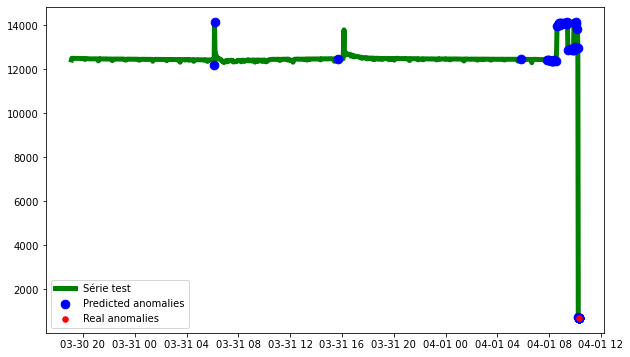

In [382]:
fig, ax = plt.subplots(figsize=(10,6))
a = test.loc[test['anomaly'] == -1, ['normalized_value']] #anomaly
ax.plot(test.index,  rs_inverse.inverse_transform(np.array(test['normalized_value']).reshape(-1, 1)), color='green', label = 'Série test', zorder=0,linewidth=5.0)
ax.scatter(a.index, rs_inverse.inverse_transform(np.array(a['normalized_value']).reshape(-1, 1)), color='blue', label = 'Predicted anomalies',zorder=1,s=75)
ax.scatter(alert_test.time, alert_test['value'], color='red', label = 'Real anomalies',zorder=1,s=30)
plt.legend()
plt.show();

# Neural Network 🧠

Jason Brownlee (21/07/2016). Time Series Prediction with LSTM Recurrent Neural Networks. Consulté à l’adresse : https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [239]:
import tensorflow as tf
from tensorflow import keras

Conseil : entraîner le réseau sur une série régularisée pour simplifier et accélérer le temps d'entraînement du modèle.

In [315]:
serie_train = df_train.set_index('dateTime')
resampled_train = serie_train.resample('1H').mean().interpolate()
resampled_train = resampled_train.reset_index()

In [448]:
train, test = resampled_train, resampled_test

In [449]:
def create_dataset(X,Y,time_steps=1): # crée nos datasets train et test
    Xs, Ys = [],[]
    for i in range(len(X)-time_steps):
        v=X.iloc[i:(i+time_steps)].values
        Xs.append(v)
        Ys.append(Y.iloc[i+time_steps])
        
    return np.array(Xs), np.array(Ys)

In [450]:
TIME_STEPS = 24

X_train, Y_train = create_dataset(train[['normalized_value']], train.normalized_value, TIME_STEPS)
X_test, Y_test = create_dataset(test[['normalized_value']], test.normalized_value, TIME_STEPS)

In [451]:
model = keras.Sequential()
model.add(keras.layers.LSTM(64,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.RepeatVector(n=X_train.shape[1]))
model.add(keras.layers.LSTM(64,return_sequences=True))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(X_train.shape[2])))
model.compile(loss='mae', optimizer='adam')

In [452]:
history=model.fit(X_train, Y_train,epochs=10,batch_size=64*8,validation_split = 0.1,shuffle=False)

Epoch 1/10
22/22 [==============================] - 16s 366ms/step - loss: 0.1798 - val_loss: 0.1967
Epoch 2/10
22/22 [==============================] - 5s 220ms/step - loss: 0.1781 - val_loss: 0.1997
Epoch 3/10
22/22 [==============================] - 5s 229ms/step - loss: 0.1782 - val_loss: 0.1984
Epoch 4/10
22/22 [==============================] - 5s 247ms/step - loss: 0.1776 - val_loss: 0.1994
Epoch 5/10
22/22 [==============================] - 6s 250ms/step - loss: 0.1778 - val_loss: 0.1990
Epoch 6/10
22/22 [==============================] - 5s 249ms/step - loss: 0.1774 - val_loss: 0.1995
Epoch 7/10
22/22 [==============================] - 6s 277ms/step - loss: 0.1775 - val_loss: 0.1995
Epoch 8/10
22/22 [==============================] - 6s 282ms/step - loss: 0.1774 - val_loss: 0.1995
Epoch 9/10
22/22 [==============================] - 6s 281ms/step - loss: 0.1774 - val_loss: 0.1995
Epoch 10/10
22/22 [==============================] - 6s 285ms/step - loss: 0.1774 - val_loss: 0.199

380/380 [==============================] - 8s 18ms/step


C:\Users\NGH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



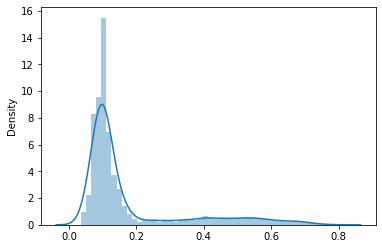

In [453]:
import seaborn as sns
X_train_pred = model.predict(X_train)
train_mae_loss = np.mean(np.abs(X_train_pred-X_train),axis=1)
sns.distplot(train_mae_loss, bins=50, kde=True);

29/29 [==============================] - 1s 21ms/step


C:\Users\NGH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



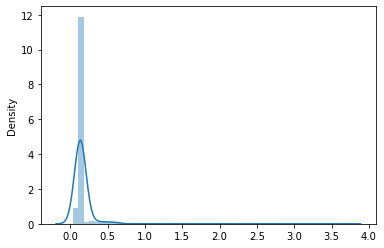

In [454]:
X_test_pred = model.predict(X_test)
test_mae_loss = np.mean(np.abs(X_test_pred-X_test),axis=1)
sns.distplot(test_mae_loss, bins=50, kde=True);

In [424]:
test_score_df.shape

(902, 5)

In [425]:
test_score_df[test_score_df.anomaly == True].shape[0]

8

In [438]:
nb_anomaly = round((percentage*len(test_score_df)))
nb_anomaly

53

In [457]:
#seuil à choisir pour couper les données normales / anormales
#seuils véhicule léger en test
THRESHOLD = 0.5 #  (train 1 véhicule de même gabarit)
#THRESHOLD = 0.4 #  (train avec tous les véhicules de même gabarit)
#THRESHOLD = 2.5 # seuil train dataset entier

#seuils véhicule lourd en test
#THRESHOLD = 5.75 #  (train 1 véhicule)
#THRESHOLD = 3 #  (train avec les autres véhicules de même gabarit)
#THRESHOLD = 6.0 # seuil train dataset entier

#seuil automatisé 
# THRESHOLD = (nb_anomaly*0.5)/test_score_df[test_score_df.anomaly == True].shape[0]
# print("Seuil d'anomalies", THRESHOLD)

test_score_df = test[TIME_STEPS:].copy()
test_score_df['loss']= test_mae_loss
test_score_df['threshold']= THRESHOLD
test_score_df['anomaly']=test_score_df.loss > test_score_df.threshold

In [459]:
thresh = 0
print(test_score_df.loc[test_score_df.anomaly == True])
while (test_score_df['anomaly'].sum() < percentage):
    thresh += 0.1
    
for obs in test_score_df['anomaly']:
    if obs < percentage 
    
thresh

                     dateTime       id       externalId      name    value  \
880 2021-04-01 09:12:50+00:00  1288078  212014918915101  PF-50129  14087.0   
849 2021-04-01 09:14:50+00:00   933002  212014918915101  PF-50129  14116.0   
869 2021-04-01 09:16:50+00:00    19248  212014918915101  PF-50129  14091.0   
875 2021-04-01 09:18:50+00:00   312652  212014918915101  PF-50129  14037.0   
873 2021-04-01 09:20:50+00:00   126417  212014918915101  PF-50129  14054.0   
885 2021-04-01 09:22:52+00:00   178842  212014918915101  PF-50129  14165.0   
895 2021-04-01 09:24:54+00:00   613462  212014918915101  PF-50129  14173.0   
878 2021-04-01 09:26:56+00:00   536111  212014918915101  PF-50129  12876.0   
896 2021-04-01 09:28:56+00:00   182791  212014918915101  PF-50129  12923.0   
894 2021-04-01 09:30:56+00:00  1454850  212014918915101  PF-50129  12928.0   
898 2021-04-01 09:32:56+00:00  1002368  212014918915101  PF-50129  12901.0   
879 2021-04-01 09:34:56+00:00   734377  212014918915101  PF-5012

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [442]:
test_score_df['anomaly']

dateTime
2021-03-30 20:23:20+00:00    False
2021-03-30 20:25:22+00:00    False
2021-03-30 20:29:22+00:00    False
2021-03-30 20:31:22+00:00    False
2021-03-30 20:43:28+00:00    False
                             ...  
2021-04-01 10:17:08+00:00    False
2021-04-01 10:17:08+00:00    False
2021-04-01 10:17:08+00:00    False
2021-04-01 10:17:08+00:00    False
2021-04-01 10:17:08+00:00    False
Name: anomaly, Length: 902, dtype: bool

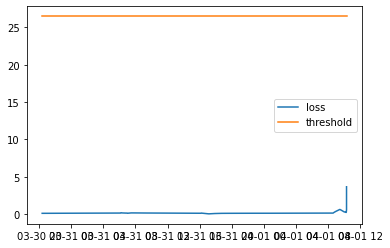

In [443]:
plt.plot(test_score_df.index, test_score_df.loss, label='loss')
plt.plot(test_score_df.index, test_score_df.threshold, label='threshold')
plt.legend();

In [429]:
anomalies= test_score_df[test_score_df.anomaly == True]
anomalies[['dateTime','id','name','value','anomaly']]

,dateTime,id,name,value,anomaly
923,2021-04-01 10:17:08+00:00,1398903,PF-50129,688.0,True
925,2021-04-01 10:17:08+00:00,1106733,PF-50129,688.0,True


C:\Users\NGH\AppData\Local\Temp\ipykernel_13704\301411643.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\NGH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\NGH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



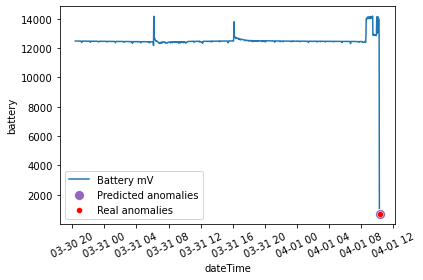

In [430]:
anomalies['battery']=rs_inverse.inverse_transform(np.array(anomalies.normalized_value).reshape(-1, 1))
plt.plot(test[TIME_STEPS:].dateTime, rs_inverse.inverse_transform(np.array(test_score_df['normalized_value']).reshape(-1, 1)),label='Battery mV',zorder=-1)
sns.scatterplot(anomalies.dateTime, anomalies['battery'],color=sns.color_palette()[4], s=100, label='Predicted anomalies',zorder=1)
sns.scatterplot(alert_test.time, alert_test['value'], color='red', label = 'Real anomalies',zorder=1)
plt.xticks(rotation=25)
plt.legend();